In [1]:
print('welcome to PGM tutorial')

welcome to PGM tutorial


In [1]:
# importing required libraries
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianModel
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# first set the structure of your graph while directly initialising your model
model = BayesianModel([('Genetic', 'Performance'),
                       ('Practice', 'Performance'),
                       ('Performance', 'Offer')])

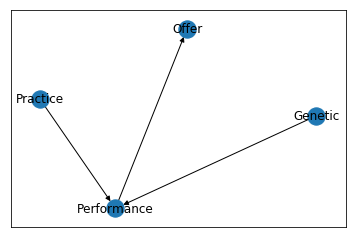

In [3]:
nx.draw_networkx(model)

In [4]:
# now if you have data then you can fit it else write out the cpd  individually
genetic_cpd = TabularCPD( variable = 'Genetic', 
                        variable_card = 2,
                        values = [[.2, .8]])

In [5]:
performane_cpd = TabularCPD( variable = 'Performance',
                           variable_card = 3,
                           values = [[.5, .8, .8, .9],
                                    [.3, .15, .1, .08],
                                    [.2, .05, .1, .02]],
                           evidence = ['Genetic', 'Practice'],
                           evidence_card = [2,2])

In [6]:
practice_cpd = TabularCPD( variable = 'Practice', 
                         variable_card = 2,
                         values = [[.7, .3]])

In [19]:
offer_cpd = TabularCPD(variable = 'Offer',
                      variable_card = 2,
                      values = [[.95, .8, .5],
                               [.05, .2, .5]],
                      evidence = ['Performance'],
                      evidence_card = [3])

In [21]:
print(offer_cpd)

+-------------+---------------+---------------+---------------+
| Performance | Performance_0 | Performance_1 | Performance_2 |
+-------------+---------------+---------------+---------------+
| Offer_0     | 0.95          | 0.8           | 0.5           |
+-------------+---------------+---------------+---------------+
| Offer_1     | 0.05          | 0.2           | 0.5           |
+-------------+---------------+---------------+---------------+


In [8]:
model.add_cpds(genetic_cpd,
               performane_cpd,
               practice_cpd, 
               offer_cpd)

In [9]:
# to check if each node is associated with cpds or not
model.check_model()

True

In [10]:
# to get the cpd of each model
model.get_cpds()

[<TabularCPD representing P(Genetic:2) at 0x15f123f5198>,
 <TabularCPD representing P(Performance:3 | Genetic:2, Practice:2) at 0x15f123f5eb8>,
 <TabularCPD representing P(Practice:2) at 0x15f123cf128>,
 <TabularCPD representing P(Offer:2 | Performance:3) at 0x15f12412400>]

In [11]:
print(model.get_cpds('Offer'))

+-------------+---------------+---------------+---------------+
| Performance | Performance_0 | Performance_1 | Performance_2 |
+-------------+---------------+---------------+---------------+
| Offer_0     | 0.95          | 0.8           | 0.5           |
+-------------+---------------+---------------+---------------+
| Offer_1     | 0.05          | 0.2           | 0.5           |
+-------------+---------------+---------------+---------------+


In [12]:
# tells the nodes on which selected node is dependent

model.active_trail_nodes('Genetic', observed = None)

{'Genetic': {'Genetic', 'Offer', 'Performance'}}

In [13]:
# tells if our moddel has any independent item with refrence to the selected item

model.local_independencies('Genetic')

(Genetic _|_ Offer, Performance, Practice)

In [14]:
# tells all the local independencies

model.get_independencies()

(Genetic _|_ Practice)
(Genetic _|_ Offer | Performance)
(Genetic _|_ Offer | Performance, Practice)
(Practice _|_ Genetic)
(Practice _|_ Offer | Performance)
(Practice _|_ Offer | Genetic, Performance)
(Offer _|_ Genetic, Practice | Performance)
(Offer _|_ Practice | Performance, Genetic)
(Offer _|_ Genetic | Performance, Practice)

In [15]:
# making inference

from pgmpy.inference import VariableElimination

In [16]:
infer = VariableElimination(model)

In [17]:
infer_offer = infer.query(variables = ['Offer'])
print(infer_offer['Offer'])

+---------+--------------+
| Offer   |   phi(Offer) |
+=========+==============+
| Offer_0 |       0.8898 |
+---------+--------------+
| Offer_1 |       0.1102 |
+---------+--------------+


C:\Users\uru\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
C:\Users\uru\Anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


In [18]:
# probability of player with bad gene (1) gettinng into team

offer_genetics_false = infer.query(variables = ['Offer'],
                                   evidence = {'Genetic':1})


print(offer_genetics_false['Offer'])


+---------+--------------+
| Offer   |   phi(Offer) |
+=========+==============+
| Offer_0 |       0.9017 |
+---------+--------------+
| Offer_1 |       0.0983 |
+---------+--------------+
